# Reproduce: Dielectric function, screening, and plasmons in two-dimensional graphene

E. H. Hwang and S. Das Sarma, <i>Dielectric function, screening, and plasmons in two-dimensional graphene</i>, Phys. Rev. B <strong>75</strong>, 205418 (2007).

Reproduced by <strong>Eunjong Kim</strong> (ekim7206@gmail.com)

In [1]:
from numpy import *
from scipy.integrate import dblquad
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# matplotlib setup
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['text.usetex'] = True

Unlike conventional 2D systems with quadratic dispersion, the graphene shows a linear energy-momentum relation 
$$\varepsilon_{\mathbf{k}s} = s\hbar v_\mathrm{F} |\mathbf{k}| $$
near the $K, K'$ points of the Brillouin zone. Here, $v_\mathrm{F}$ is the 2D Fermi velocity and $s=\pm1$ is the band index. Based on this linear relation, the dynamical screening function (dielectric function) can be obtained using the random-phase approximation (RPA):
$$\epsilon(\mathbf{q},\omega) = 1 + v_\mathrm{C}(\mathbf{q})\Pi(\mathbf{q},\omega)$$
where $v_\mathrm{C}(\mathbf{q}) = 2\pi e^2/\kappa q$ is the 2D Coulomb potential in the momentum space.

$\Pi(\mathbf{q},\omega)$ is the 2D polarizability given by
$$\Pi(\mathbf{q},\omega) = -g_s g_v\sum_{s,s' = \pm 1} \int \frac{d^2 k}{(2\pi)^2} \frac{f_{\mathbf{k},s} - f_{\mathbf{k+q},s'}}{\hbar \omega + \varepsilon_{\mathbf{k},s} - \varepsilon_{\mathbf{k+q},s'}+i\eta} F_{s, s'}(\mathbf{k},\mathbf{k+q}),$$
where $g_s=g_v=2$ denote the spin and valley degeneracies and $\eta\rightarrow 0^+$ is an infinitesimal positive number. $F_{s,s'}(\mathbf{k},\mathbf{k}')= (1 + ss'\cos{\theta_{\mathbf{k},\mathbf{k}'}})/2$ is the overlap between wavefunctions with $\theta_{\mathbf{k},\mathbf{k}'}$ being the angle between vectors $\mathbf{k}$ and $\mathbf{k}'$. Here, $f_{\mathbf{k}, s}$ is the Fermi distribution function.

The 2D polarizability can be decomposed into two parts, $\Pi = \Pi^{+} + \Pi^{-}$, with

$$\Pi^{+}(\mathbf{q}, \omega) = -\frac{g_s g_v}{2} \int \frac{d^{2}k}{(2\pi)^2}\left[\frac{(f_{\mathbf{k},+} - f_{\mathbf{k+q},+})(1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},+} + i\eta}
+\frac{f_{\mathbf{k},+} (1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta} 
-\frac{f_{\mathbf{k+q},+}(1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},+} + i\eta}\right],$$

$$\Pi^{-}(\mathbf{q}, \omega) = -\frac{g_s g_v}{2} \int \frac{d^{2}k}{(2\pi)^2}\left[\frac{(f_{\mathbf{k},-} - f_{\mathbf{k+q},-})(1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},-} + i\eta}
+\frac{f_{\mathbf{k},-} (1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},+} + i\eta} 
-\frac{f_{\mathbf{k+q},-}(1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta}\right].$$

In [3]:
def energy(k, phi, q, s):
    '''
    Linear energy dispersion near the K point of the momentum space
    '''
    return (s * sqrt(k ** 2 + q ** 2 + 2 * k * q * cos(phi)))

$$\cos{\theta_{\mathbf{k},\mathbf{k+q}}} = \frac{\mathbf{k}\cdot\mathbf{k+q}}{k|\mathbf{k+q}|} = \frac{k + q\cos{\phi}}{\sqrt{k^2 + q^2 + 2kq\cos{\phi}}}$$

In [4]:
def cosine(k, phi, q):
    '''
    cosine between the two vectors k and k + q as a function of phi,
    which is the angle bewteen k and q.
    '''
    return ((k + q * cos(phi)) / sqrt(k**2 + q**2 + 2 * k * q * cos(phi)))

In the zero-temperature limit $T\rightarrow 0$, the Fermi distribution function $f_{\mathbf{k} s}$ reduces to a simple step function or unity depending on the band index $s=\pm 1$:
$$f_{\mathbf{k} s} = \left[e^{\beta(\varepsilon_{\mathbf{k}s}-\mu)} + 1\right]^{-1}\quad \xrightarrow{T\rightarrow 0} \quad \Theta(\varepsilon_\mathrm{F} - \varepsilon_{\mathbf{k}s}) = 
\begin{cases} \Theta(k_\mathrm{F} - k) & \textrm{for }s= +1 \\
              1 & \textrm{for }s=-1 
\end{cases}$$
Here, the Fermi energy is defined as $\varepsilon_\mathrm{F} = \hbar v_\mathrm{F}k_\mathrm{F}$, with $k_\mathrm{F}$ being the Fermi wavevector.

In [5]:
N = 20

# range of q/kF values: 0 to 5
q = linspace(1e-2, 5, N)

In [6]:
# empty arrays to store polarizability values
polarizability_p, polarizability_m = zeros(len(q)), zeros(len(q))

In [7]:
eta = 1e-4

We express the plus and the minus polarizabilities in simpler forms and perform the numerical integration:

$$\Pi^{+}(\mathbf{q}, \omega) \xrightarrow{T\rightarrow0} -\frac{g_s g_v}{2} \int \frac{d^{2}k}{(2\pi)^2}\left\{\frac{[\Theta(k_\mathrm{F} - k) - \Theta(k_\mathrm{F} - |\mathbf{k+q}|)](1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}})}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},+} + i\eta}
+\left[\frac{\Theta(k_\mathrm{F} - k)}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta} 
-\frac{\Theta(k_\mathrm{F} - |\mathbf{k+q}|)}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},+} + i\eta} \right](1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}})\right\} $$

$$= -\frac{g_s g_v}{2}\left[ \int_{k<k_\mathrm{F}} \frac{d^{2}k}{(2\pi)^2}\left(\frac{1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},+} + i\eta}
+\frac{1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta} 
\right)
-\int_{|\mathbf{k+q}|<k_\mathrm{F}} \frac{d^{2}k}{(2\pi)^2}
\left(\frac{1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},+} + i\eta} + 
\frac{1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},+} + i\eta} \right)
\right]$$

$$= -\frac{g_s g_v}{2} \int_{k<k_\mathrm{F}} \frac{d^{2}k}{(2\pi)^2}\left[\left(\frac{1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},+} + i\eta}
+\frac{1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta} 
\right)
-
\left(\frac{1 + \cos{\theta_{\mathbf{k-q},\mathbf{k}}}}{\hbar\omega + \varepsilon_{\mathbf{k-q},+}-\varepsilon_{\mathbf{k},+} + i\eta} + 
\frac{1 - \cos{\theta_{\mathbf{k-q},\mathbf{k}}}}{\hbar\omega + \varepsilon_{\mathbf{k-q},-}-\varepsilon_{\mathbf{k},+} + i\eta} \right)
\right]$$

$$= -\frac{g_s g_v}{2} \int_{k<k_\mathrm{F}} \frac{d^{2}k}{(2\pi)^2}\left[\left(\frac{1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},+} + i\eta}
+\frac{1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta} 
\right)
-
\left(\frac{1 + \cos{\theta_{\mathbf{k-q},\mathbf{k}}}}{\hbar\omega + \varepsilon_{\mathbf{k-q},+}-\varepsilon_{\mathbf{k},+} + i\eta} + 
\frac{1 - \cos{\theta_{\mathbf{k-q},\mathbf{k}}}}{\hbar\omega + \varepsilon_{\mathbf{k-q},-}-\varepsilon_{\mathbf{k},+} + i\eta} \right)
\right]$$

$$\therefore-\frac{\Pi^{+}(\mathbf{q},\omega)}{D(\varepsilon_\mathrm{F})} = \int_{\tilde{k}<1} \frac{d^{2}\tilde{k}}{4\pi}\left[\left(\frac{1 + \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k},+}-\tilde{\varepsilon}_{\mathbf{k+q},+} + i\tilde{\eta}}
+\frac{1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k},+}-\tilde{\varepsilon}_{\mathbf{k+q},-} + i\tilde{\eta}}
\right)
-
\left(\frac{1 + \cos{\theta_{\mathbf{k-q},\mathbf{k}}}}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k-q},+}-\tilde{\varepsilon}_{\mathbf{k},+} + i\tilde{\eta}} + 
\frac{1 - \cos{\theta_{\mathbf{k-q},\mathbf{k}}}}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k-q},-}-\tilde{\varepsilon}_{\mathbf{k},+} + i\tilde{\eta}} \right)
\right] $$

In [8]:
def polarizability_p_integrand(k, phi, q, omega):
    '''
    For the evaluation of this dblquad, k-integration followed
    by phi-integration is more efficient.
    '''
    e11 = (1 + cosine(k, phi, q)) / (omega + energy(k, phi, 0, +1) - energy(k, phi, q, +1) + 1j * eta)
    e12 = (1 - cosine(k, phi, q)) / (omega + energy(k, phi, 0, +1) - energy(k, phi, q, -1) + 1j * eta)
    e1 = e11 + e12

    e21 = (1 + cosine(k, phi, -q)) / (omega + energy(k, phi, -q, +1) - energy(k, phi, 0, +1) + 1j * eta)
    e22 = (1 - cosine(k, phi, -q)) / (omega + energy(k, phi, -q, -1) - energy(k, phi, 0, +1) + 1j * eta)
    e2 = -(e21 + e22)
    return - k * real(e1 + e2) / (4 * pi)

In [9]:
omega = 0

for idx, q_ in enumerate(q):
    polarizability_p[idx] = dblquad(polarizability_p_integrand, 0, 2*pi,
                                    lambda k:0, lambda k: 1,
                                    args=(q_,omega))[0]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


$$\Pi^{-}(\mathbf{q}, \omega) \xrightarrow{T\rightarrow0} -\frac{g_s g_v}{2} \int \frac{d^{2}k}{(2\pi)^2}\left[
\frac{ 1}{\hbar\omega + \varepsilon_{\mathbf{k},-}-\varepsilon_{\mathbf{k+q},+} + i\eta} 
-\frac{1}{\hbar\omega + \varepsilon_{\mathbf{k},+}-\varepsilon_{\mathbf{k+q},-} + i\eta}\right](1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}) $$

$$\therefore- \frac{\Pi^{-}(\mathbf{q}, \omega)}{D(\varepsilon_\mathrm{F})}= \int \frac{ d^{2}\tilde{k}}{4\pi}\left[
\frac{1}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k},-}-\tilde{\varepsilon}_{\mathbf{k+q},+} + i\tilde{\eta}} 
-\frac{1}{\tilde{\omega} + \tilde{\varepsilon}_{\mathbf{k},+}-\tilde{\varepsilon}_{\mathbf{k+q},-} + i\tilde{\eta}}\right](1 - \cos{\theta_{\mathbf{k},\mathbf{k+q}}}) $$

where $\tilde{\omega} = \hbar\omega/\varepsilon_\mathrm{F}$, $\tilde{\varepsilon}_{\mathbf{k},s} = \varepsilon_{\mathbf{k},s}/\varepsilon_\mathrm{F}$, and $\tilde{k} = k/k_\mathrm{F}$. Here $$D(\varepsilon_\mathrm{F}) = \frac{g_s g_v}{2\pi} \frac{k_\mathrm{F}}{\hbar v_\mathrm{F}}$$
is the density of states at the Fermi energy. Note that the static polarizability at $q=0$ satisfies $$\Pi(0, 0) = \Pi^{+}(0,0) + \Pi^{-} (0, 0) = -D(\varepsilon_\mathrm{F}).$$

In [10]:
def polarizability_m_integrand(phi, k, q, omega):
    '''
    For the evaluation of this dblquad, phi-integration followed by
    k-integration is much more efficient.
    '''
    e1 = + 1 / (omega + energy(k, phi, 0, -1) - energy(k, phi, q, +1) + 1j * eta)
    e2 = - 1 / (omega + energy(k, phi, 0, +1) - energy(k, phi, q, -1) + 1j * eta)
    e = real(e1 + e2) * (1 - cosine(k, phi, q))
    return - k * e / (4 * pi)

In [11]:
# cutoff wavevector for numerical integration
k_c = 5e1

omega = 0

for idx, q_ in enumerate(q):
    polarizability_m[idx] = dblquad(polarizability_m_integrand, 0, k_c,
                                    lambda phi: 0, lambda phi: 2 * pi,
                                    args=(q_, omega))[0]

/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


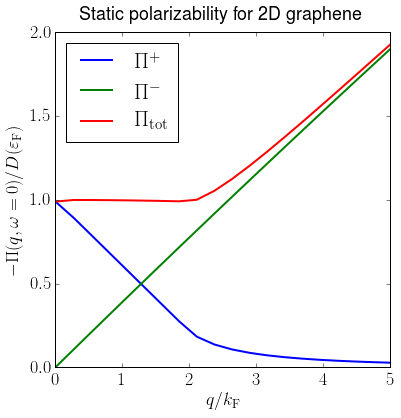

In [12]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.plot(q, polarizability_p, label=r'$\Pi^{+}$', lw=2)
ax.plot(q, polarizability_m, label=r'$\Pi^{-}$', lw=2)
ax.plot(q, polarizability_p + polarizability_m, label=r'$\Pi_\mathrm{tot}$', lw=2)

ax.set_xlabel(r'$q/k_\mathrm{F}$')
ax.set_ylabel(r'$- \Pi(q,\omega=0)/D(\varepsilon_\mathrm{F})$')
fig.text(0.18, 0.93, r'Static polarizability for 2D graphene')
ax.set_xlim([0, 5]); ax.set_ylim([0, 2])
ax.legend(loc=0);

This is the static $(\omega=0)$ polarizability for 2D graphene and Figure 2 of [Phys. Rev. B <strong>75</strong>, 205418 (2007)] has been reproduced.

In [13]:
%reload_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 3.4.4 64bit [GCC 4.2.1 Compatible Apple LLVM 7.0.2 (clang-700.1.81)]
IPython 4.0.1
OS Darwin 15.2.0 x86_64 i386 64bit
numpy 1.10.4
scipy 0.16.1
matplotlib 1.5.0
Tue Jan 12 01:06:13 2016 KST